In [3]:
## Importing required libraries
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline


In [7]:

df=pd.read_csv('notebooks/data/qsar_fish_toxicity.csv')

In [3]:
df.head()


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [5]:
X = df.drop(labels=['LC50 [-LOG(mol/L)]'],axis=1)
#X = df.drop(labels=['LC50 [-LOG(mol/L)]','GATS1i'],axis=1)
y = df[['LC50 [-LOG(mol/L)]']]
#X, y = new_df.drop('LC50 [-LOG(mol/L)]', axis=1), df['LC50 [-LOG(mol/L)]']

In [6]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:

# min max on 1, std on 3
min_max=MinMaxScaler()
scaler = StandardScaler()

#df['MLOGP']=min_max.fit_transform(df[['MLOGP']])
df['MLOGP']=pd.DataFrame(scaler.fit_transform(df[['MLOGP']]))
df['CIC0']=pd.DataFrame(scaler.fit_transform(df[['CIC0']]))
df['SM1_Dz(Z)']=pd.DataFrame(scaler.fit_transform(df[['SM1_Dz(Z)']]))
df['GATS1i']=pd.DataFrame(scaler.fit_transform(df[['GATS1i']]))


In [14]:
knn_result = []

for k in range (2, 10):
    clf = Pipeline([
        ("scaler", scaler),
        ("knn", KNeighborsRegressor(n_neighbors=k))
        ])
    clf.fit(X_train, y_train)
    cross_val = cross_val_score(clf, X, y, cv=10)
    cross_val_avg = cross_val.mean()
    knn_result.append(cross_val_avg)
    print(f"R-Squared for k = {k} : {cross_val_avg:.3f}")

R-Squared for k = 2 : 0.500
R-Squared for k = 3 : 0.548
R-Squared for k = 4 : 0.575
R-Squared for k = 5 : 0.588
R-Squared for k = 6 : 0.582
R-Squared for k = 7 : 0.586
R-Squared for k = 8 : 0.591
R-Squared for k = 9 : 0.590


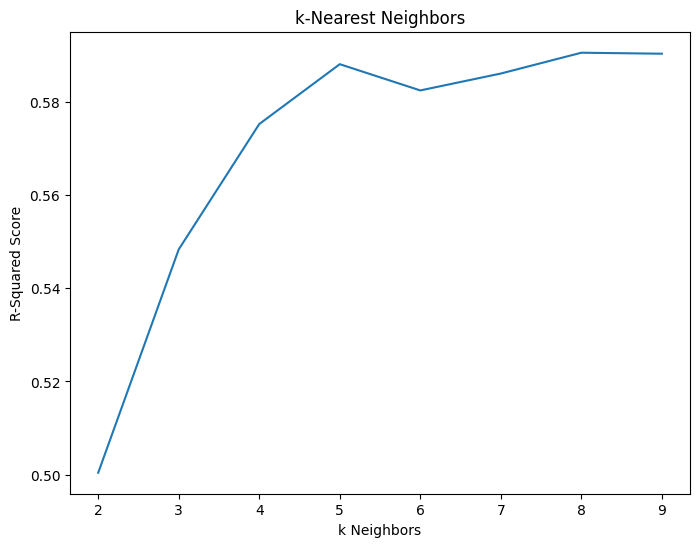

In [16]:
plt.figure(figsize=(8,6))
plt.plot([i for i in range(2, 10)], knn_result)
plt.xlabel("k Neighbors")
plt.ylabel("R-Squared Score")
plt.title("k-Nearest Neighbors")
plt.show()

In [17]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
knn_training_pred = knn.predict(X_train)
knn_training_rsq = knn.score(X_train, y_train)
knn_training_rmse = np.sqrt(mean_squared_error(y_train, knn_training_pred))
knn_training_mae = (mean_absolute_error(y_train, knn_training_pred))
print(f"R-Squared for the training set : {knn_training_rsq:.3f}")
print(f"RMSE for the training set : {knn_training_rmse:.3f}")
print(f"MAE for the training set : {knn_training_mae:.3f}")

R-Squared for the training set : 0.680
RMSE for the training set : 0.818
MAE for the training set : 0.582


In [18]:
knn_testing_pred = knn.predict(X_test)
knn_testing_rsq = knn.score(X_test, y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))
knn_testing_mae = (mean_absolute_error(y_test, knn_testing_pred))

print(f"R-Squared for the testing set : {knn_testing_rsq:.3f}")
print(f"RMSE for the testing set : {knn_testing_rmse:.3f}")
print(f"MAE for the testing set : {knn_testing_mae:.3f}")

R-Squared for the testing set : 0.601
RMSE for the testing set : 0.932
MAE for the testing set : 0.666


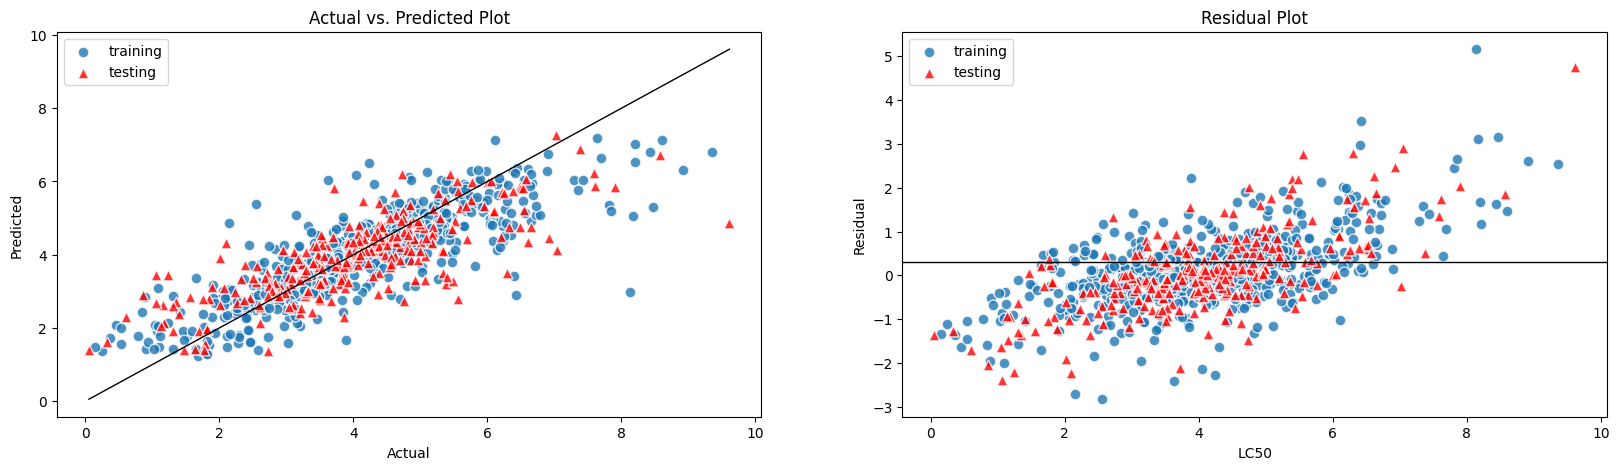

In [19]:
residual_train = y_train - knn_training_pred
residual_test = y_test - knn_testing_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_training_pred, s=60, alpha=0.8, edgecolor="white", label="training")
ax1.scatter(y_test, knn_testing_pred, marker="^", s=60, c="r", alpha=0.8, edgecolor="white", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=60, edgecolor="white", alpha=0.8, label="training")
ax2.scatter(y_test, residual_test, marker="^", s=60, c="r", edgecolor="white", alpha=0.8, label="testing")
ax2.axhline(y=0.3, linewidth= 1, linestyle="-", c="black")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("LC50")
ax2.set_ylabel("Residual")

plt.show()

# Pickling


In [20]:
import pickle


In [ ]:
with open('new_regmodel.pkl', 'wb') as f:
    pickle.dump(knn, f, pickle.HIGHEST_PROTOCOL)

In [21]:
pickle.dump(knn,open('regmodel.pkl','wb'))

In [22]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [ ]:
knn.predict(scaler.transform(df.head(1).reshape(1,-1)))

In [ ]:
## Prediction
pickled_model.predict(scaler.transform(df))

In [ ]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

In [24]:
## Splitting the data into independent features and dependent features
X, y = df.drop('LC50(mol/L)', axis=1), df['LC50(mol/L)']

## Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=34, stratify=X[['NdsCH']])

In [25]:
## Creating a pipeline for data preprocessing
preprocess_pipe = Pipeline(steps=[
    ('scaling', StandardScaler())
])

In [27]:
## Creating objects of the machine learning algorithms that we want to try

## model 1: Support Vector Regression
svr = SVR()

## model 2: Nearest Neighbors Regression
knr = KNeighborsRegressor()

## model 3: Decision Tree Regression
dtr = DecisionTreeRegressor(max_depth=4,random_state=123)

## model 4: Random Forest Regression
rfr = RandomForestRegressor()


## model 6: AdaBoost Regressor
abr = AdaBoostRegressor(random_state=123)

## model 7: Gradient Boosting Regressor
gbr = GradientBoostingRegressor()


## model 9: voting regressor of model 1, model 2 and model 4
vr = VotingRegressor(estimators = [('svr', svr), ('knr', knr), ('rfr', rfr), ('gbr', gbr)])


In [28]:
## svr pipeline
svr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('svr_model',svr)
])

## knr pipeline
knr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('knr_model',knr)
])

## dtr pipeline
dtr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('dtr_model',dtr)
])

## rfr pipeline
rfr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('rfr_model',rfr)
])


## abr pipeline
abr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('abr_model', abr)
])

## gbr pipeline
gbr_pipe = Pipeline(steps=[
    ('preprocess_pipe',preprocess_pipe),
    ('gbr_model', gbr)
])

## vr pipeline
vr_pipe = Pipeline(steps=[
    ('preprocess_pipe', preprocess_pipe),
    ('vr_model', vr)
])




In [32]:
## Finding out the best model using the cross validation  

pipelines = [svr_pipe, knr_pipe, dtr_pipe, rfr_pipe,abr_pipe, gbr_pipe, vr_pipe]
models = ['SupportVectorRegressor', 'KneighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor',  'AdaboostRegressor', 'GradientBoostRegressor', 'VotingRegressor', ]
cv = KFold(n_splits=5)
for index, pipeline in enumerate(pipelines):
    cv_list = cross_val_score(estimator=pipeline, X=X, y=y,cv=cv,scoring='r2')
    mean = np.round(cv_list.mean(),3)
    std = np.round(cv_list.std(),3)
    print(f"The cross validation score for the model {models[index]} is {mean} +/- {std}.")

The cross validation score for the model SupportVectorRegressor is 0.614 +/- 0.065.
The cross validation score for the model KneighborsRegressor is 0.583 +/- 0.077.
The cross validation score for the model DecisionTreeRegressor is 0.445 +/- 0.108.
The cross validation score for the model RandomForestRegressor is 0.596 +/- 0.081.
The cross validation score for the model AdaboostRegressor is 0.485 +/- 0.071.
The cross validation score for the model GradientBoostRegressor is 0.589 +/- 0.097.
The cross validation score for the model VotingRegressor is 0.631 +/- 0.079.
